<a href="https://colab.research.google.com/github/tanzeyl/Self-Study/blob/main/Haberman's_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/haberman.csv")

In [3]:
data.columns

Index(['Age', 'Year', 'P_Nodes', 'S_Status'], dtype='object')

In [4]:
data.describe()

,Age,Year,P_Nodes,S_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Objective
### We have 306 data points and 4 features.
Our objective is to perform Exploratory Data Analysis on the given dataset.


In [5]:
data.shape

(306, 4)

In [8]:
data['S_Status'].value_counts()

1    225
2     81
Name: S_Status, dtype: int64

We can see that 225 patients survived 5 years or longer while 81 patients died within the first 5 years after the operation.

# Univariate Analysis

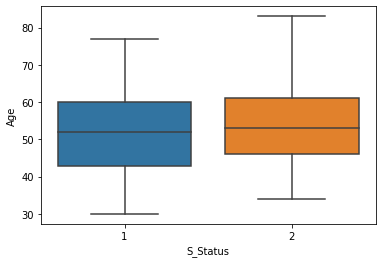

In [12]:
sns.boxplot(x="S_Status", y="Age", data=data)

There is no clear diference between these two plots. Hence, age is not a good factor to determine the survival status.

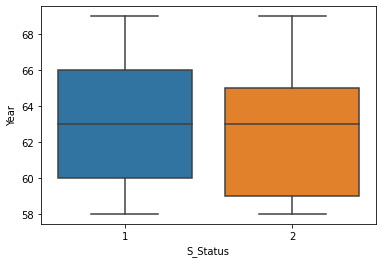

In [13]:
sns.boxplot(x="S_Status", y="Year", data=data)

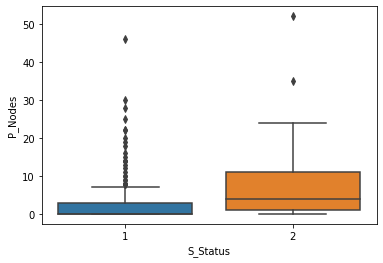

In [14]:
sns.boxplot(x="S_Status", y="P_Nodes", data=data)

Same is the case with rest of these variables.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


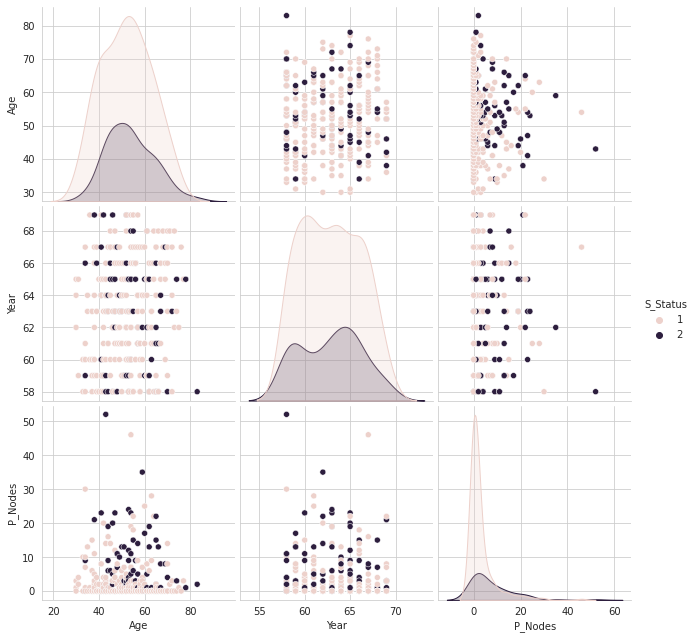

In [16]:
sns.set_style("whitegrid")
sns.pairplot(data, hue="S_Status", size=3)

No relation can be concluded between any of these variables as there is no distinction between any of these scatter plots.

In [22]:
data_1 = data.loc[data["S_Status"] == 1]
data_2 = data.loc[data["S_Status"] == 2]

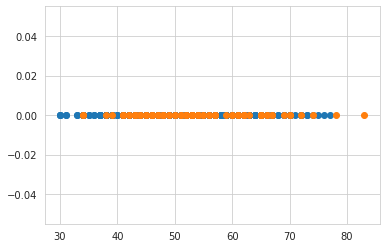

In [24]:
plt.plot(data_1["Age"], np.zeros_like(data_1['Age']), 'o')
plt.plot(data_2["Age"], np.zeros_like(data_2['Age']), 'o')

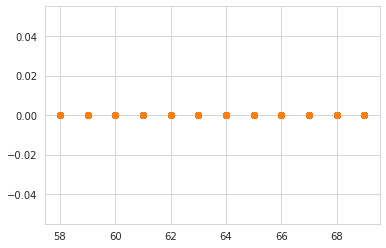

In [26]:
plt.plot(data_1["Year"], np.zeros_like(data_1['Year']), 'o')
plt.plot(data_2["Year"], np.zeros_like(data_2['Year']), 'o')

No handles with labels found to put in legend.


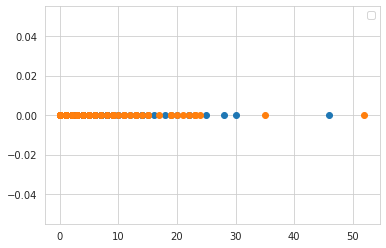

In [30]:
plt.plot(data_1["P_Nodes"], np.zeros_like(data_1['P_Nodes']), 'o')
plt.plot(data_2["P_Nodes"], np.zeros_like(data_2['P_Nodes']), 'o')
plt.legend()

One might be tempted to use P_Nodes for distinction because of the above graph, but keep the mind that the blue dots are over-written by orange dots because the data of data_2 is plotted later on the same graph sheet.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


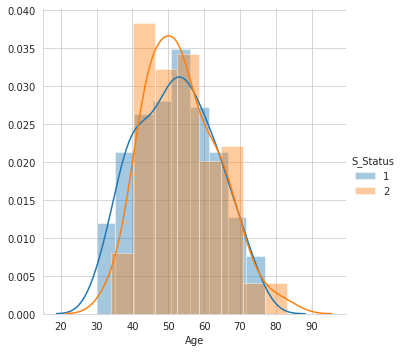

In [32]:
sns.FacetGrid(data, hue="S_Status", size=5) .map(sns.distplot, "Age") .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


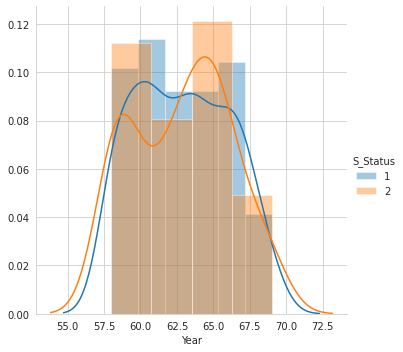

In [33]:
sns.FacetGrid(data, hue="S_Status", size=5) .map(sns.distplot, "Year") .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


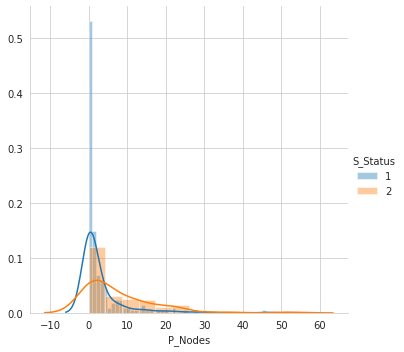

In [34]:
sns.FacetGrid(data, hue="S_Status", size=5) .map(sns.distplot, "P_Nodes") .add_legend()

Even though, every graph has the two PDFs overlapping each other, the best variable for distinction would be P_Nodes.

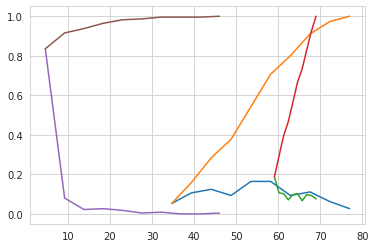

In [38]:
counts, bin_edges = np.histogram(data_1['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(data_1['Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(data_1['P_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

In [39]:
data["Age"].mean()

52.45751633986928

In [40]:
data["Year"].mode()

0    58
dtype: int64

In [41]:
data["P_Nodes"].mean()

4.026143790849673